# Competição House Prices - Advanced Regression Techniques do Kaggle

In [88]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [61]:
teste = pd.read_csv('teste.csv')
base = pd.read_csv('treino.csv')

In [62]:
teste.shape

(1459, 80)

In [63]:
print(f'A base de teste tem {teste.shape[0]} linhas e {teste.shape[1]} colunas')
print(f'A base de treino tem {base.shape[0]} linhas e {base.shape[1]} colunas')

A base de teste tem 1459 linhas e 80 colunas
A base de treino tem 1460 linhas e 81 colunas


In [64]:
# Visualizando a % de NaN em cada variável do DataFrame
(base.isna().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [65]:
(teste.isna().sum()/teste.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
dtype: float64

In [66]:
# Filtrando as colunas com mais de 15% de dados NaN na base de treino
remover_Nan_treino = base.columns[(base.isna().sum()/base.shape[0]) > 0.15]
base.drop(remover_Nan_treino, axis = 1, inplace= True)
# Removendo as colunas com mais de 15% de dados NaN na base de treino
remover_object_treino = base.columns[base.dtypes == 'object']
base.drop(remover_object_treino, axis = 1, inplace= True)

# Filtrando as colunas com mais de 15% de dados NaN na base de teste
remover_Nan_teste = teste.columns[(teste.isna().sum()/teste.shape[0]) > 0.15]
teste.drop(remover_Nan_teste, axis = 1, inplace= True)
# Removendo as colunas com mais de 15% de dados NaN na base de teste
remover_object_teste = teste.columns[teste.dtypes == 'object']
teste.drop(remover_object_teste, axis = 1, inplace= True)

In [67]:
# Substituindo o restante das linhas que contenham dados NaN e dropando a coluna Id na base de treino
base = base.fillna(-1)
base.reset_index(drop = True, inplace=True)
base.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


In [68]:
# Substituindo o restante das linhas que contenham dados NaN e dropando a coluna Id na base de teste
teste = teste.fillna(-1)
teste.reset_index(drop = True, inplace=True)
teste.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010


# Árvore de regressão

In [69]:
# Separando a base de treino em variável resposta e variáveis explicativas
y = base.SalePrice
X = base.drop('SalePrice', axis = 1)
# Separando a base de treino em treino e validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=0)

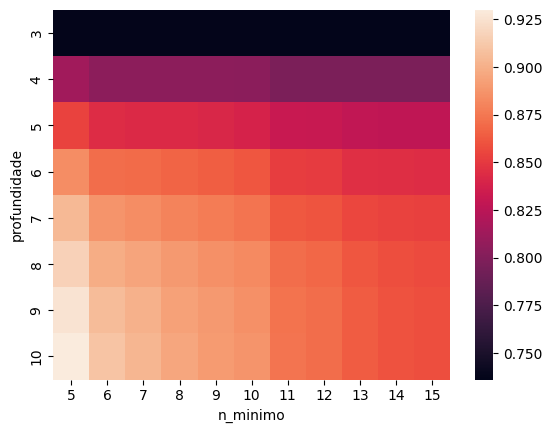

In [70]:
# Criando um heatmap para definir a melhor construção para a Árvore de regressão
r2 = []
profundidade_p = []
num_min_obs_n = []
for p in range (3,11):
  for n in range (5,16):
    arv_1 = DecisionTreeRegressor(max_depth = p, min_samples_leaf = n).fit(X_treino,y_treino)
    r2_1 = arv_1.score(X_treino,y_treino)
    r2.append(r2_1)
    profundidade_p.append(p)
    num_min_obs_n.append(n)
df_r2 = pd.DataFrame({'r2':r2,'profundidade':profundidade_p,'n_minimo':num_min_obs_n})
sns.heatmap(df_r2.pivot(index='profundidade', columns='n_minimo', values='r2'));

 Podemos observar que o melhor $r^2$ para a árvore de regressão se encontra com o número mínimo de observações em 5 e a profundidade máxima em 10

In [71]:
arvore_1 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5, random_state=0).fit(X_treino,y_treino)
print(f'Profundidade: {arvore_1.tree_.max_depth}')
print(f'r2 da base de validação: {arvore_1.score(X_validacao,y_validacao):.2f}')
print(f'MSE da base de validação: {mean_squared_error(y_validacao, arvore_1.predict(X_validacao)):.2f}')

Profundidade: 10
r2 da base de validação: 0.74
MSE da base de validação: 1753280259.75


# Regressão linear

In [ ]:
modelo = '''SalePrice ~ MSSubClass + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd +
            MasVnrArea   + BsmtUnfSF + TotalBsmtSF + GrLivArea + BsmtFullBath + BedroomAbvGr +
            KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + KitchenAbvGr +
            TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars  + WoodDeckSF + ScreenPorch'''
md = smf.ols(modelo, data = base)
reg_lin = md.fit_regularized(method = 'elastic_net',
                            refit = True,
                            L1_wt = 1,
                            alpha = 0.01)
reg_lin.summary()

# Comparando os modelos

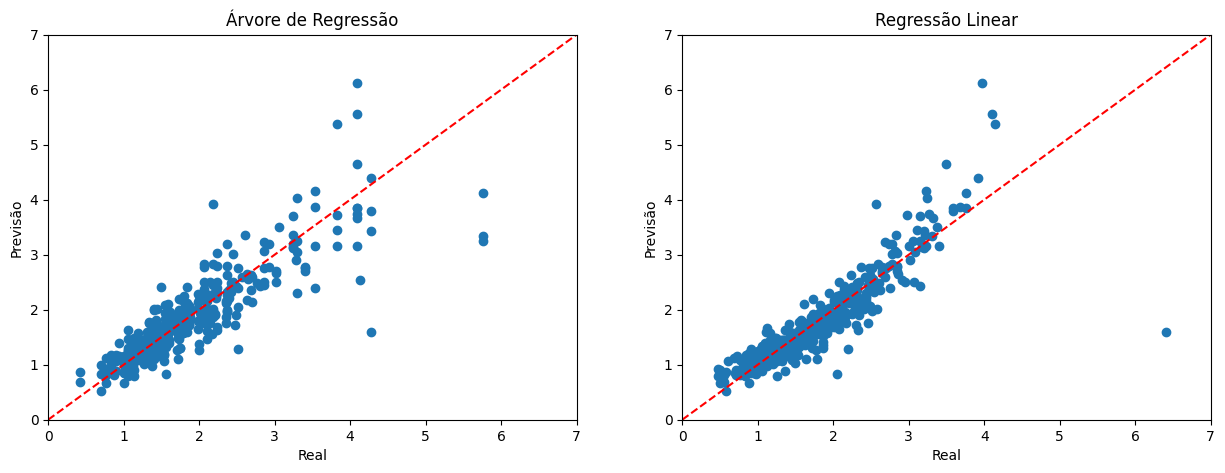

In [129]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(arvore_1.predict(X_validacao)/100000,y_validacao/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(reg_lin.predict(X_validacao)/100000,y_validacao/100000)
ax[1].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].set_title('Árvore de Regressão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].set_title('Regressão Linear')

plt.show()

# Resultados

In [126]:
y_final_linear = reg_lin.predict(teste)
teste['SalePrice_linear'] = pd.DataFrame(y_final_linear)

In [127]:
resultado_reg_linear = teste[['Id', 'SalePrice_linear']]

In [128]:
resultado_reg_linear.to_csv('resultado.csv',index=False)

In [ ]:
y_final_arvore = arvore_1.predict(teste)
teste['SalePrice_arvore'] = pd.DataFrame(y_final_linear)

In [ ]:
resultado_arvore_reg = teste[['Id', 'SalePrice_arvore']]

In [ ]:
resultado_reg_linear.to_csv('resultado.csv',index=False)